In [50]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import seaborn as sns
%matplotlib inline 

pd.set_option('display.max_columns', None)

df1 = pd.read_csv("adult.data", header=None, engine='python')
df2 = pd.read_csv("adult.test",  header=None, engine='python')

df = pd.concat([df1, df2], axis=0, ignore_index=True)

df = df.rename(columns={0: 'age', 1 : 'workclass', 2:'fnlwgt', 3:'education', 4:'education-num', 5:'marital-status', 6:'occupation', 7:'relationship', 8:'race', 9:'sex', 10:'capital-gain', 11:'capital-loss', 12:'hours-per-week', 13:'native-country', 14:'income' })

df = df.drop_duplicates()

df.drop(df[df['workclass']==' ?'].index, inplace=True)
df.drop(df[df['occupation']==' ?'].index, inplace=True)
df.drop(df[df['native-country']==' ?'].index, inplace=True)

df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

df.loc[df.income == '<=50K.', 'income'] = '<=50K'
df.loc[df.income == '>50K.', 'income'] = '>50K'

dfc = df.copy()



dfc = pd.get_dummies(dfc, columns=['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'], drop_first=False)

dfc = pd.get_dummies(dfc, columns=['income'], drop_first=True)



In [54]:
dfc

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,NaN,77516.0,13.0,2174.0,0.0,40.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,NaN,83311.0,13.0,0.0,0.0,13.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,NaN,215646.0,9.0,0.0,0.0,40.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,NaN,234721.0,7.0,0.0,0.0,40.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,NaN,338409.0,13.0,0.0,0.0,40.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32559,NaN,201490.0,9.0,0.0,0.0,20.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,

In [52]:
df2

,,,,,,,,,,,,,,0
|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


<AxesSubplot:title={'center':'Correlation of features'}>

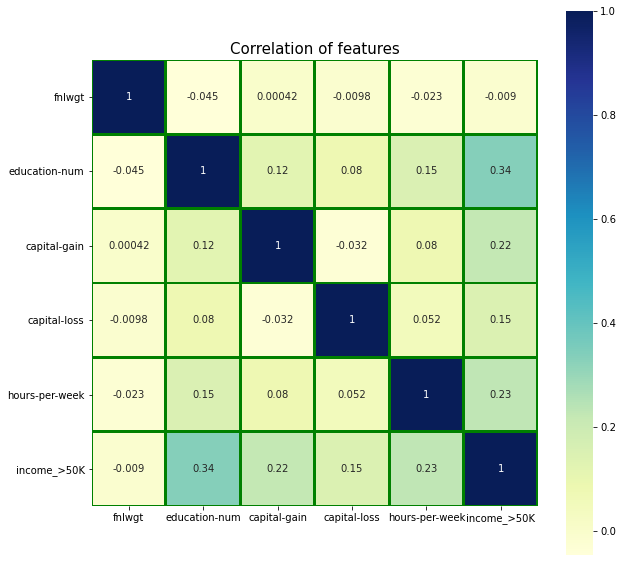

In [53]:
tc = dfc.iloc[:,[0, 1, 2, 3, 4, 5, -1]].corr()

plt.figure(figsize=(10,10))
plt.title('Correlation of features',size=15)
sns.heatmap(tc, linewidths=2, cmap = 'YlGnBu', linecolor='green',square=True, annot = True)

Text(0.5, 1.5, 'Correlation of features')

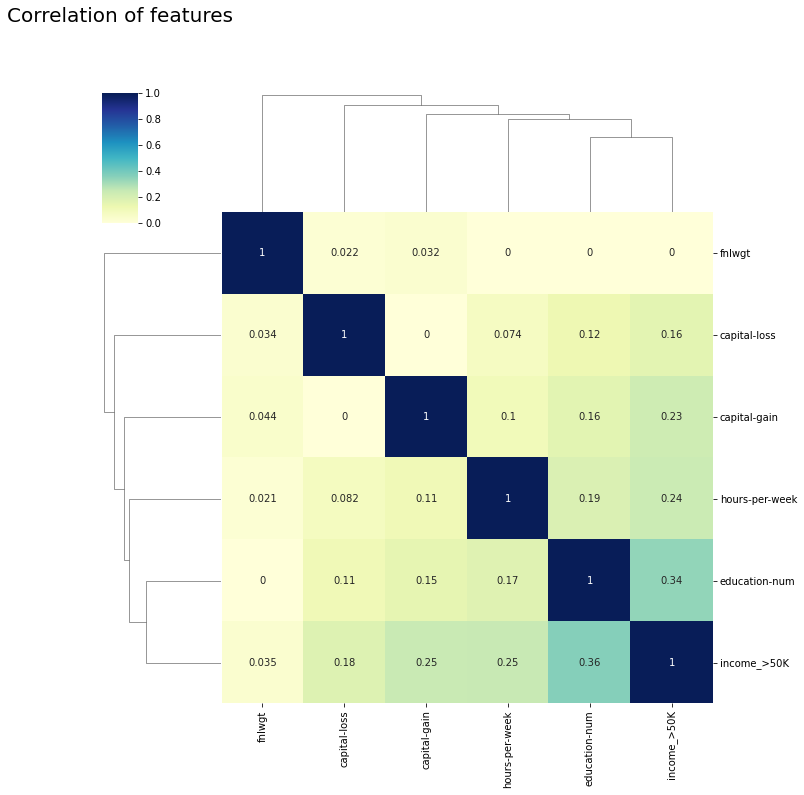

In [36]:

sns.clustermap(tc,cmap='YlGnBu',standard_scale=1,figsize=(10,10),annot = True)
plt.title('Correlation of features', y=1.5, size=20)

In [37]:
#MARITAL STATUS

Text(0.5, 1.5, 'Marital Status Correlation')

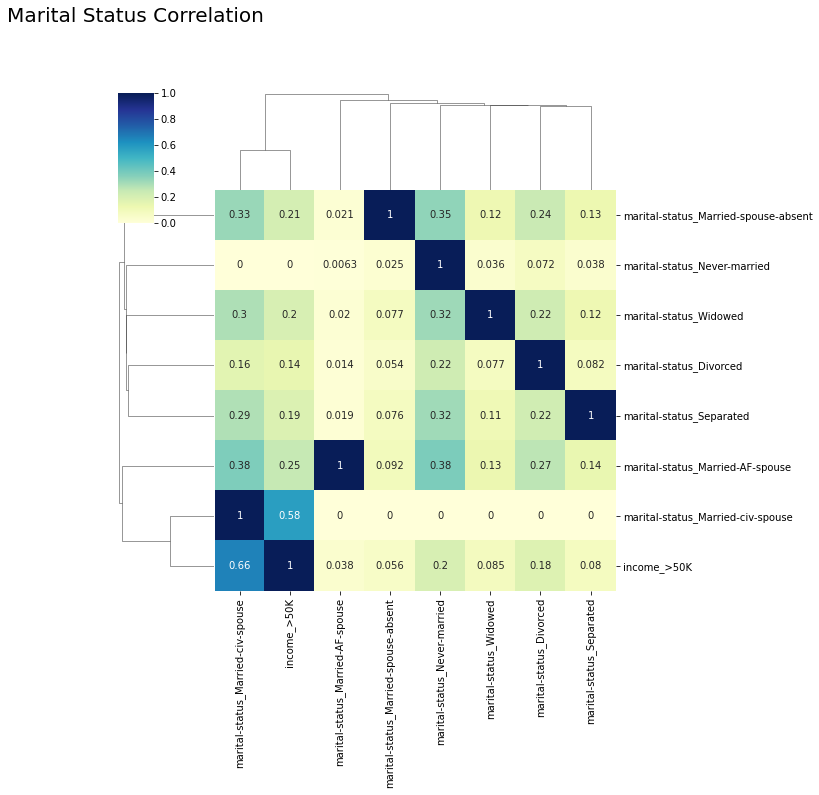

In [38]:

kc= dfc.loc[:, dfc.columns.str.contains('marital-status') | dfc.columns.str.contains('income')].corr()
sns.clustermap(kc,cmap='YlGnBu',standard_scale=1,figsize=(10,10),annot = True)
plt.title("Marital Status Correlation", y=1.5, size=20)

In [39]:
#WORKCLASS

Text(0.5, 0, 'Work class')

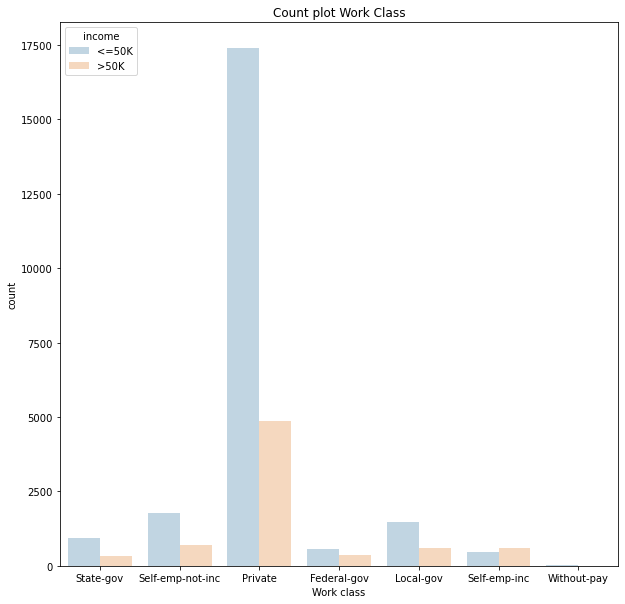

In [40]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, x="workclass",hue='income',alpha=0.3)
plt.title("Count plot Work Class")
plt.xlabel("Work class")

<AxesSubplot:title={'center':'Work Class Correlation'}>

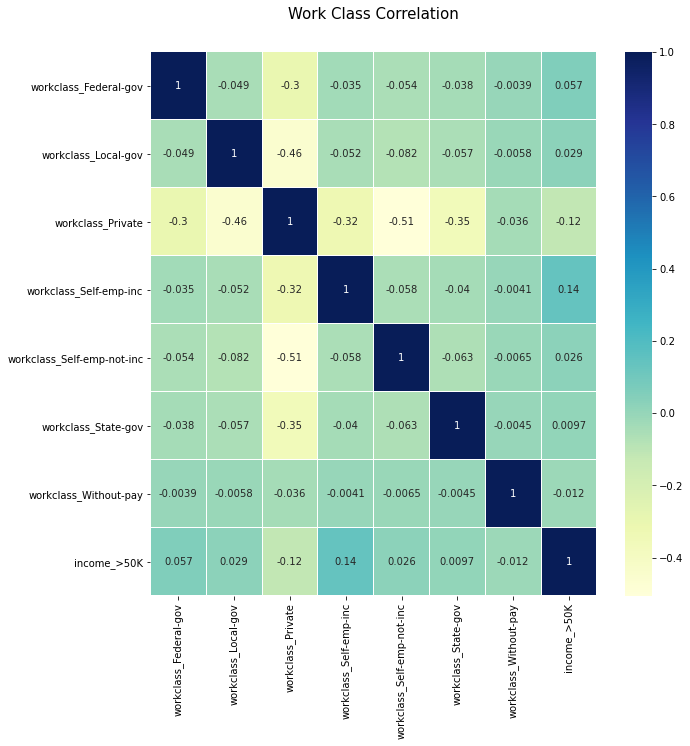

In [41]:
colormap = plt.cm.YlGnBu
plt.figure(figsize=(10,10))
plt.title('Work Class Correlation', y=1.05, size=15)
sns.heatmap(
    dfc.loc[:, dfc.columns.str.contains('workclass') | dfc.columns.str.contains('income')].corr(),
    linewidths=0.1,vmax=1.0, square=False, cmap=colormap, linecolor='white', annot=True)


Text(0.5, 1.5, 'Work Class Correlation')

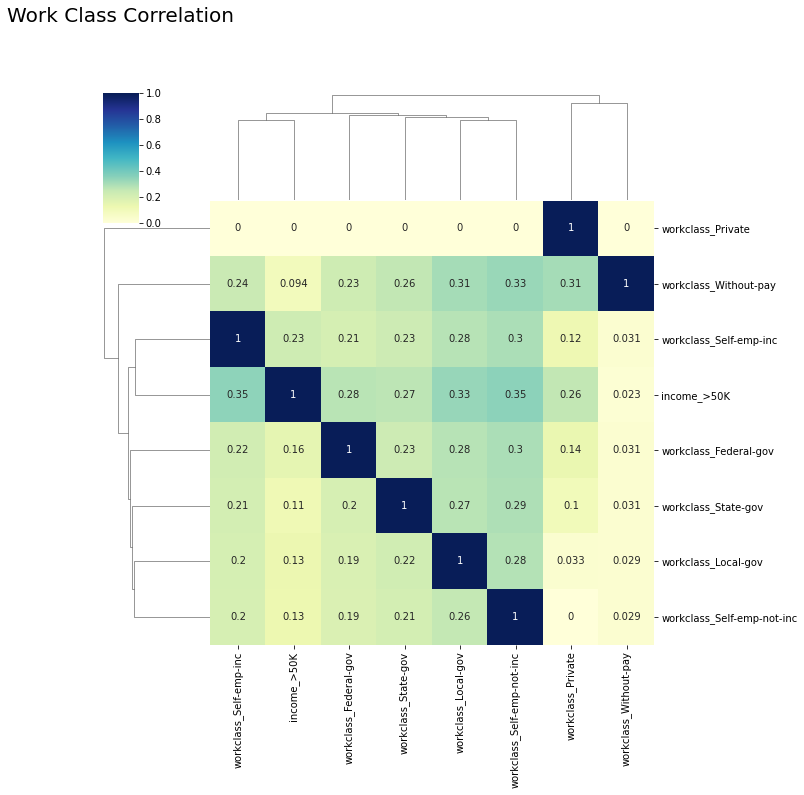

In [42]:

kc= dfc.loc[:, dfc.columns.str.contains('workclass') | dfc.columns.str.contains('income')].corr()
sns.clustermap(kc,cmap='YlGnBu',standard_scale=1,figsize=(10,10),annot = True)
plt.title("Work Class Correlation", y=1.5, size=20)

In [43]:
#RACE
import dexplot as dxp

ModuleNotFoundError: No module named 'dexplot'

In [44]:

dxp.count('race', data=df, split='income',normalize='race')


NameError: name 'dxp' is not defined

Text(0.5, 0, 'Race')

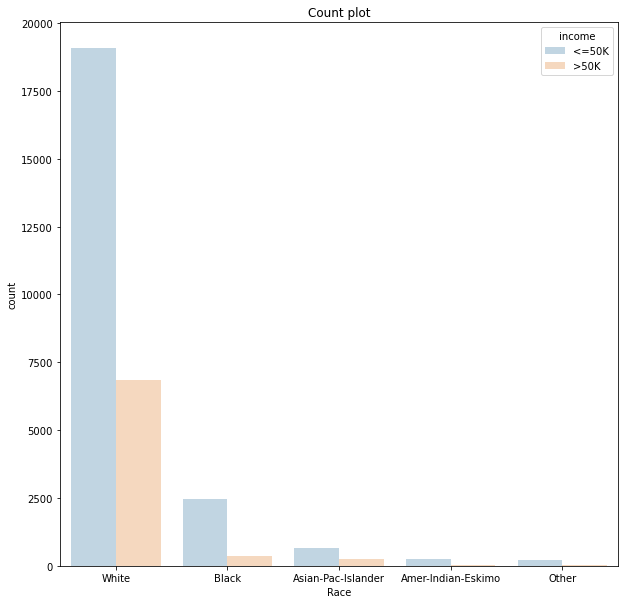

In [45]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, x="race",hue='income',alpha=0.3)
plt.title("Count plot")
plt.xlabel("Race")

Text(0.5, 1.5, 'Race Correlation')

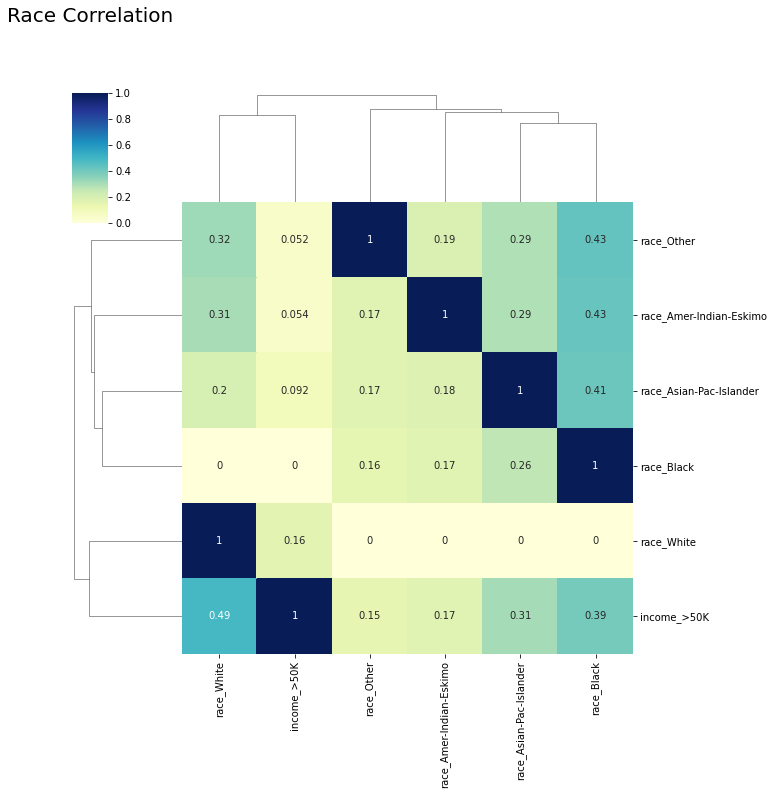

In [46]:

kc= dfc.loc[:, dfc.columns.str.contains('race') | dfc.columns.str.contains('income')].corr()
sns.clustermap(kc,cmap='YlGnBu',standard_scale=1,figsize=(10,10),annot = True)
plt.title("Race Correlation", y=1.5, size=20)

In [47]:
#AGE

In [48]:
plt.figure(figsize=(10,10))
sns.boxplot(x='income',y='age',data=df,palette='rainbow')
plt.title("Box Plot (Age vs Income)")
plt.ylabel("Age")
plt.xlabel("Income")

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 720x720 with 0 Axes>

ValueError: arange: cannot compute length

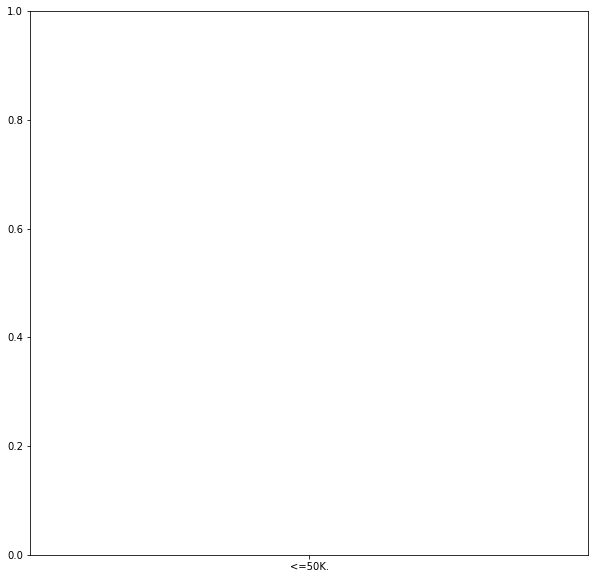

In [49]:
plt.figure(figsize=(10,10))
sns.histplot(data=df, x="age",hue='income',alpha=0.3)
plt.title("Histogram")
plt.xlabel("Age")

In [22]:
#CAPITAL GAIN

Text(0.5, 0, 'capital-gain')

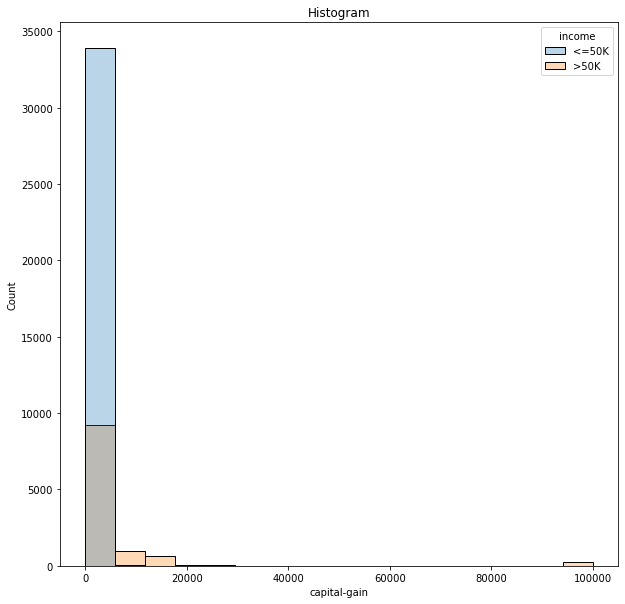

In [54]:
plt.figure(figsize=(10,10))
sns.histplot(data=df, x="capital-gain",hue='income',alpha=0.3)
plt.title("Histogram")
plt.xlabel("capital-gain")

Text(0.5, 0, 'capital-loss')

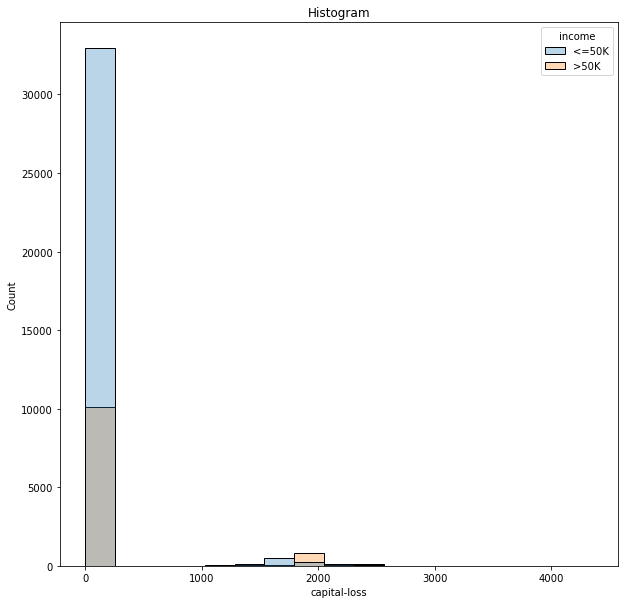

In [55]:
plt.figure(figsize=(10,10))
sns.histplot(data=df, x="capital-loss",hue='income',alpha=0.3)
plt.title("Histogram")
plt.xlabel("capital-loss")

In [56]:
#SEX

Text(0.5, 0, 'Sex')

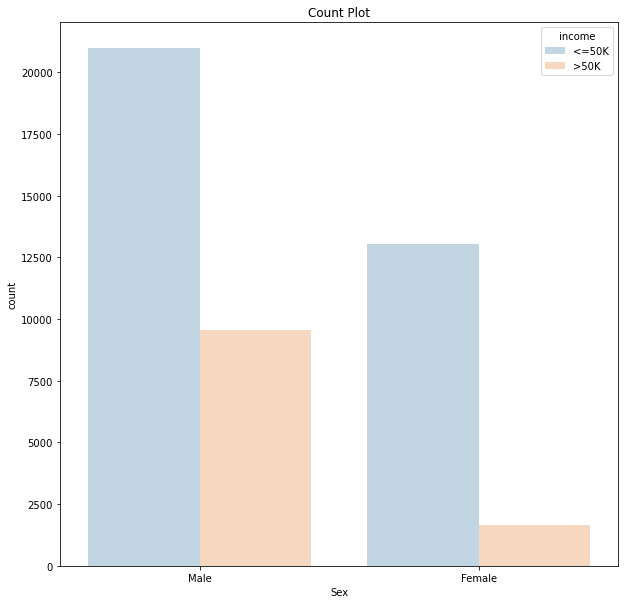

In [7]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, x="sex",hue='income',alpha=0.3)
plt.title("Count Plot")
plt.xlabel("Sex")

In [58]:
#FINAL WEIGHT

Text(0.5, 0, 'Income')

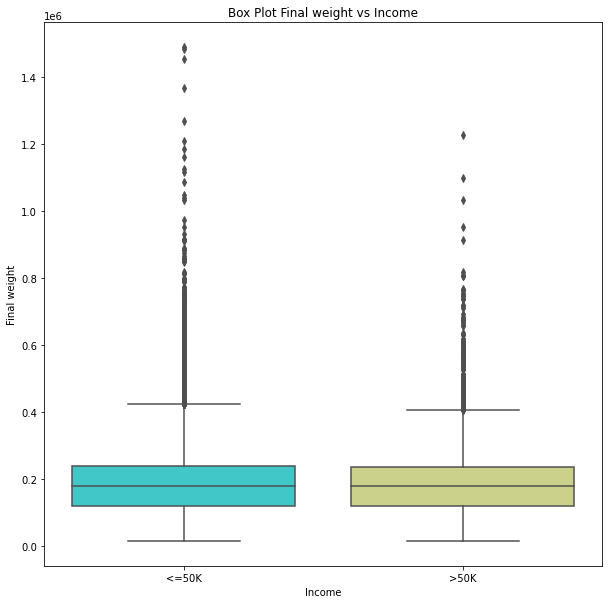

In [59]:
plt.figure(figsize=(10,10))
sns.boxplot(x='income',y='fnlwgt',data=df,palette='rainbow')
plt.title("Box Plot Final weight vs Income")
plt.ylabel("Final weight")
plt.xlabel("Income")

Text(0.5, 0, 'Final weight')

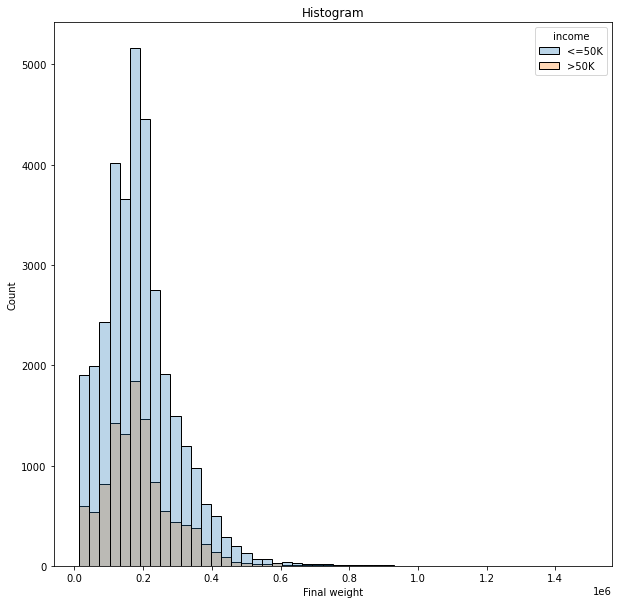

In [60]:
plt.figure(figsize=(10,10))
sns.histplot(data=df, x="fnlwgt",hue='income',alpha=0.3,bins=50)
plt.title("Histogram")
plt.xlabel("Final weight")

In [61]:
#EDUCATION NUMBER

Text(0.5, 0, 'Income')

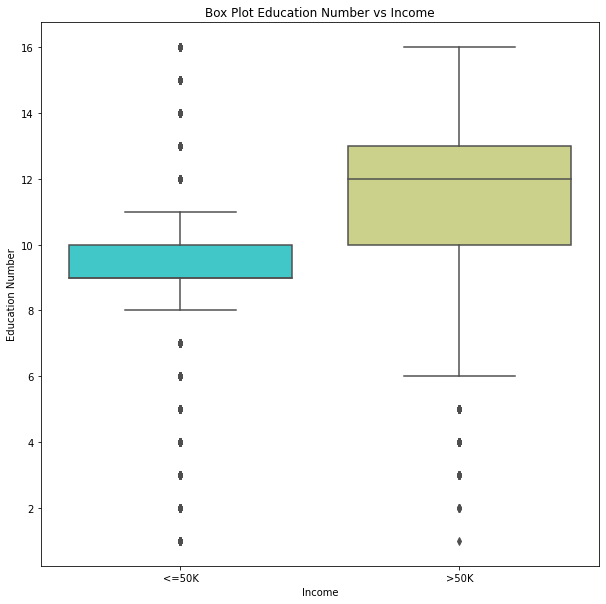

In [62]:
plt.figure(figsize=(10,10))
sns.boxplot(x='income',y='education-num',data=df,palette='rainbow')
plt.title("Box Plot Education Number vs Income")
plt.ylabel("Education Number")
plt.xlabel("Income")

Text(0.5, 0, 'Final weight')

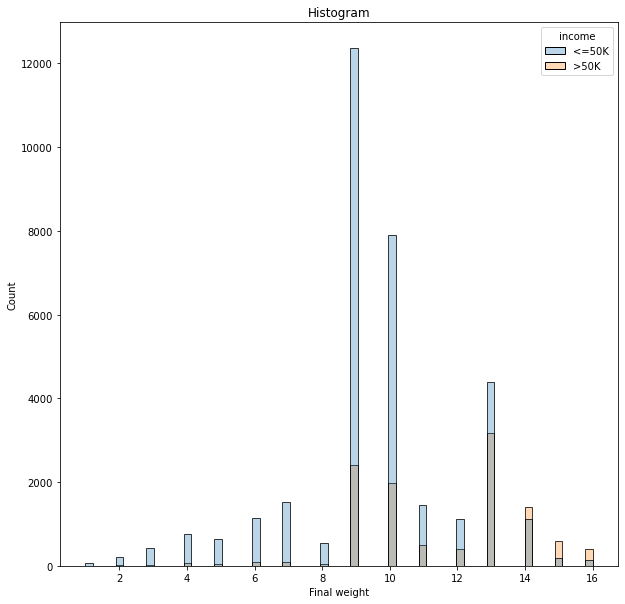

In [63]:
plt.figure(figsize=(10,10))
sns.histplot(data=df, x="education-num",hue='income',alpha=0.3)
plt.title("Histogram")
plt.xlabel("Final weight")

In [64]:
#HOURS PER WEEK

Text(0.5, 0, 'Income')

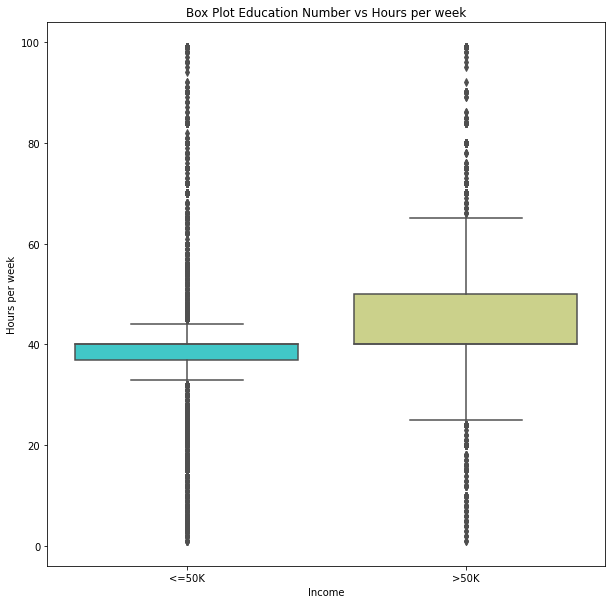

In [65]:
plt.figure(figsize=(10,10))
sns.boxplot(x='income',y='hours-per-week',data=df,palette='rainbow')
plt.title("Box Plot Education Number vs Hours per week")
plt.ylabel("Hours per week")
plt.xlabel("Income")

Text(0.5, 0, 'Hours per week')

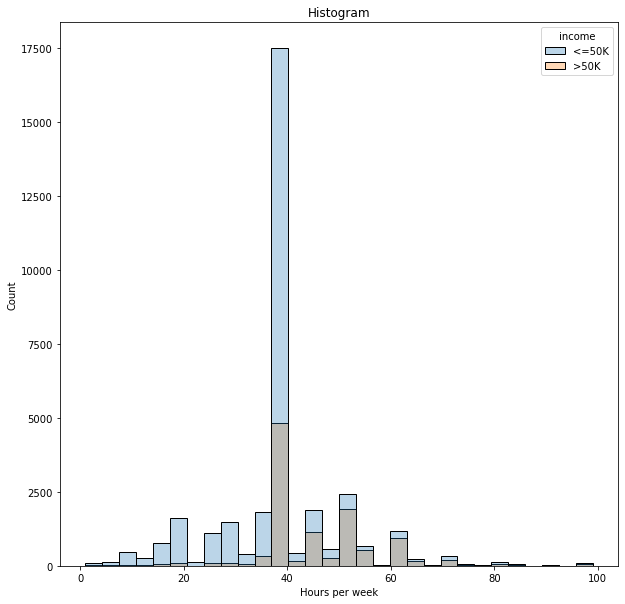

In [66]:
plt.figure(figsize=(10,10))
sns.histplot(data=df, x="hours-per-week",hue='income',alpha=0.3,bins=30)
plt.title("Histogram")
plt.xlabel("Hours per week")